## Homework 3 - Due on October 5, 2021 at 11.59 PM

### This homework is about understanding linear regression using the Advertising data set

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [15, 5]

#### Read the data and visualize it to see how the variables are related

In [3]:
adv = pd.read_csv('Advertising.csv')
adv.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


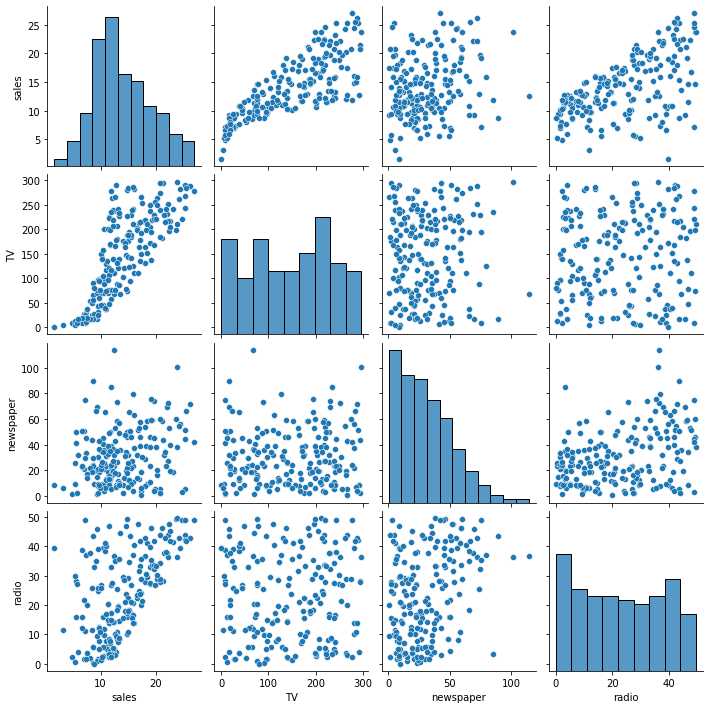

In [4]:
sns.pairplot(adv,vars={'sales','TV','radio','newspaper'})

#### Extract values from the DataFrame into numpy arrays x and y

In [5]:
x = adv.iloc[:,1:2].values #tv amount spent
#print(len(x))
y = adv.iloc[:,4].values #total sales

#### Q2 ####

#Assigning radio sales to a variable 
radio_sales = adv.iloc[:,2:3].values

#Assigning newspaper sales to a variable 
news_sales = adv.iloc[:,3:4].values

############


#### Define the Model to be a linear regression model. The intercept corresponds to having the constant term $\beta_0$

In [6]:
#TV
model = LinearRegression(fit_intercept=True)
reg = model.fit(x,y)
print('TV: Regression coefficients are',reg.coef_)
print('TV: The Intercept beta_0 is',reg.intercept_,'\n')


#### Q2 ####

#Radio 
tv_model = LinearRegression(fit_intercept=True)
radio_reg = tv_model.fit(radio_sales,y)
print('Radio: Regression coefficients are',radio_reg.coef_)
print('Radio: The Intercept beta_0 is',radio_reg.intercept_,'\n')

#Newspaper
radio_model = LinearRegression(fit_intercept=True)
news_reg = radio_model.fit(news_sales,y)
print('Newspaper: Regression coefficients are',news_reg.coef_)
print('Newspaper: The Intercept beta_0 is',news_reg.intercept_)

############

TV: Regression coefficients are [0.04753664]
TV: The Intercept beta_0 is 7.032593549127693 

Radio: Regression coefficients are [0.20249578]
Radio: The Intercept beta_0 is 9.311638095158283 

Newspaper: Regression coefficients are [0.0546931]
Newspaper: The Intercept beta_0 is 12.35140706927816


In [7]:
#TV
yfit = reg.predict(x)
mse = mean_squared_error(y,yfit)
R2 = r2_score(y,yfit)
print('TV: Mean square error = ',mse)
print('TV: R squared = ',R2,'\n')

#### Q2 ####

#Radio
radio_fit = radio_reg.predict(radio_sales)
mse_radio = mean_squared_error(y,radio_fit)
R2_radio = r2_score(y,radio_fit)
print('Radio: Mean square error = ',mse_radio)
print('Radio: R squared = ',R2_radio,'\n')

#Newspaper
news_fit = news_reg.predict(news_sales)
mse_news = mean_squared_error(y,news_fit)
R2_news = r2_score(y,news_fit)
print('Newspaper: Mean square error = ',mse_news)
print('Newspaper: R squared = ',R2_news,'\n')

############

TV: Mean square error =  10.512652915656757
TV: R squared =  0.611875050850071 

Radio: Mean square error =  18.09239774512544
Radio: R squared =  0.33203245544529525 

Newspaper: Mean square error =  25.674022720559698
Newspaper: R squared =  0.05212044544430516 



### Q2. I have given the code to plot the scatter plot and linear regression fit for Sales versus TV Add whatever is required so that you plot the scatter plot and linear regression fit for Sales vs radio and Sales vs newspaper in the other two plots. Also compute the regression coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$ for the two regression problems

### I mixed the code above for the regressions to make it have better flow. Everything is labeled and printing is done for all

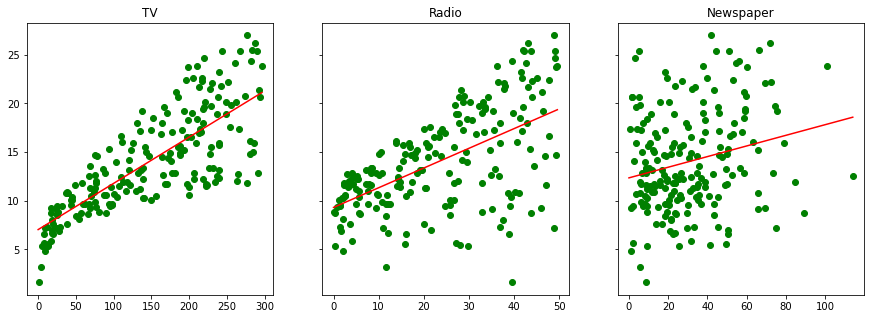

In [36]:
fig,ax = plt.subplots(1,3,sharey='row')
xax = np.linspace(0,np.max(x),100).reshape(-1,1)
yfit2 = reg.predict(xax)
#Plotting scatter for salves vs TV
ax[0].scatter(x,y,color='green')

#Plotting Regression for sales vs radio
ax[0].plot(xax,yfit2,color='red')
ax[0].title.set_text('TV') 

#### Q2 ####

#Radio
radio_ax = np.linspace(0,np.max(radio_sales),100).reshape(-1,1)
radio_fit2 = radio_reg.predict(radio_ax)

#Plotting scatter for sales vs radio
ax[1].scatter(radio_sales,y,color = 'green')
ax[1].title.set_text('Radio')

#Plotting Regression for sales vs radio
ax[1].plot(radio_ax,radio_fit2,color='red')


#Newspaper 
news_ax = np.linspace(0,np.max(news_sales),100).reshape(-1,1)
news_fit2 = news_reg.predict(news_ax)

#Plotting scatter for sales vs newspaper 
ax[2].scatter(news_sales,y,color = 'green')
ax[2].title.set_text('Newspaper')

#Plotting Regression for sales vs newspaper
ax[2].plot(news_ax,news_fit2,color='red')

############


### Q3. Compute the standard errors for $\hat{\beta}_0$ and $\hat{\beta}_1$, $t$-statistic and $p$-value for the Sales versus TV simple regression and show that you get the result in Table 3.1. 

TV: RSE = [3.25865637]
TV: Standard error for B1 = [0.00269061]
TV: Standard error for B0 = [0.45784294]
TV: t-statistic for B1 = [17.6676256]
TV: t-statistic for B0 = [15.36027517]


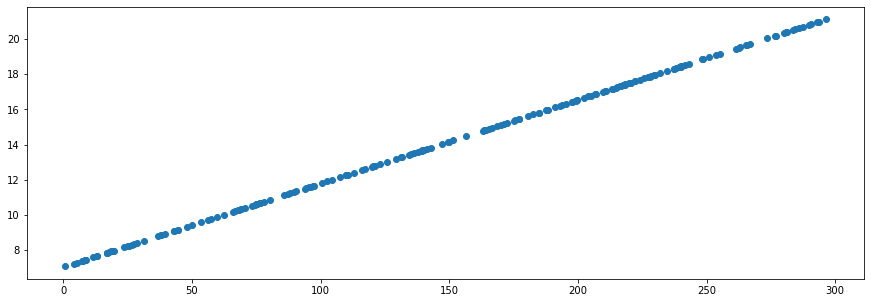

In [41]:
y = adv.iloc[:,4:5].values #making y a 2D array 
y_est = reg.predict(x)
#print(y_est)
plt.scatter(x,y_est)
#print(y_est[1])
RSS = 0
for i in range(0,len(y)):
    RSS = RSS + (y[i] - y_est[i])**2 
 
RSE = np.sqrt(RSS / (len(y) - 2))
print('TV: RSE =',RSE)
#This function computes the standard error of B1 for regressions
def SE_b1(RSE,X):
    mu_X = np.mean(X)
    diff_x = 0
    for i in range(0,len(X)):
        diff_x = diff_x + (x[i] - mu_X)**2
    SE_b1 = np.sqrt((RSE**2) / diff_x)
    return SE_b1

#Testing that the standard error matches for the TV B1
seb1_tv = SE_b1(RSE,x)
print('TV: Standard error for B1 =',seb1_tv)

#This function computes the standard error of B1 for regressions
def SE_b0(RSE,X):
    mu_X = np.mean(X)
    diff_x = 0
    for i in range(0,len(X)):
        diff_x = diff_x + (x[i] - mu_X)**2
    SE_b0 = np.sqrt( (RSE**2) * ( (1/len(X)) + ((mu_X**2) / diff_x ) ) )
    return SE_b0

#Testing that the standard error matches known for TV intercept
seb0_tv = SE_b0(RSE,x)
print('TV: Standard error for B0 =',seb0_tv)

#This function computes the T-statistics for B1
def t_statistic_1(seb1,regression):
    b1 = regression.coef_
    t_stat_1 = b1 / seb1
    return t_stat_1

#Testing what the t-statistic for TV's B1
t_stat_1_tv = t_statistic_1(seb1_tv,reg)
print('TV: t-statistic for B1 =',t_stat_1_tv)

#This function computes the T-statistics for B0
def t_statistic_0(seb0,regression):
    b0 = regression.intercept_
    t_stat_0 = b0 / seb0
    return t_stat_0

#Testing what the t-statistic for TV's B1
t_stat_0_tv = t_statistic_0(seb0_tv,reg)
print('TV: t-statistic for B0 =',t_stat_0_tv)


### Q4. Now, we move on to multiple linear regression. Compute the (multiple) linear regression model with all three variables TV, Newspaper and Radio as predictors and Sales as the response. Verify that the coefficients that you get match with those in the book. Compute the RSS, $R^2$

### Q5. Compute the standard error, $t$-statistic and $p$-value and verify the result with Table 3.4

### Q6. Repeat Q4 without using scikit.learn, i.e., use the least squares estimate that we derived in class using matrix algebra to compute the coefficients and see whether you get identical results